# Classical statistical inference: Regression and model fitting

## Table of Content

- IV. [Regression and Model fitting](#IV-Regression-and-model-fitting)
    - IV.1 [Regression for linear models](#IV.1-Regression-for-linear-models:)
        * [IV.1.1 Fitting a straight line](#IV.1.1-Fitting-a-straight-line)
        * [IV.1.2 General least square fit](#IV.1.2-General-least-square-fit)
        * [IV.1.3 Basis function regression](#IV.1.3-Basis-function-regression)
        * [IV.1.4 Multi Linear regression](#IV.1.4-Multi-Linear-regression)
    - IV.2 [Regularization and penalization of the likelihood](#IV.2-Regularization-and-penalization-of-the-likelihood)
        * [IV.2.1 Ridge regression:](#IV.2.1-Ridge-regression:)
        * [IV.2.2 LASSO regression:](#IV.2.2-LASSO-regression:)
        * [IV.2.3 How to fix $\lambda$ ?:](#IV.2.3-How-to-fix-$\lambda$-?:)
    - IV.3 [Regression for non linear models](#IV.3-Regression-for-non-linear-models:)
- XX. [References and supplementary material](#X)

In [2]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## IV Regression and model fitting

Having in hands a set of mutidimensional data, let's say an independent variable $x$, and dependent variable $y$. Then the problem of regression consists in finding the expectation value of $y$ given x, i.e. $E(y|x)$ (i.e. this is a conditional expectation value). This is bread and butter of scientific research. If we have a model for the conditional distribution, we can write $y \, = \, f(x\,|\,{\boldsymbol{\theta}})$ where ${{\boldsymbol{\theta}}}$ are the parameters of the model. Regression will then consists in finding the parameters $\boldsymbol{\theta}$ that yields $E(f(x\,|\,\boldsymbol{\theta}))$. Note here that $x$, the independent variable, does not have to be a random variable, it could be a deterministic variable, such as a deterministic sampling of a time series. 

The way you will deal with regression depends of the chacteristics of your problem:
- *Linearity*: Is the model linear *in its parameters*, i.e. $f(x\,|\,{\boldsymbol{\theta}}) = \sum_{p=1}^{k} \, \theta_p g_p(x)$, where $g_p(x)$ can be a non linear function of $x$ BUT does not depend on any of the free parameters. 
- *Complexity*: A large number of independent variables increases the complexity of the error covariance matrix and of the problem solving. For linear models with small/negligible errors on the independent variable, problem complexity is not a severe issue. 
- *Error behaviour*: The uncertainties on the dependent and independent variables, and their correlation, generally govern the choice of the regression method. Several situation can occur:
    1. Dependent and independent variable have negligible errors
    2. Dependent variable $y$ has significant homoscedastic Gaussian error, $x$ has negligible errors. 
    3. Dependent variable $y$ has significant heteroscedastic Gaussian error, $x$ has negligible errors. 
    4. Dependent variable $y$ has non Gaussian errors, but their behaviour is known. 
    5. Dependent variable $y$ has non Gaussian errors, but their behaviour is unknown
    6. Errors on the independent variable $x$ are unknown, but the full covariance matrix can be treated as Gaussian. 
    7. All variables have non gaussian errors. 
    
        - Case 1, 2, 3, 4 ->  easily solvable with frequentist or Bayesian techniques.
        - Case 5 -> 7 are more easily solvable with Bayesian techniques that we will introduce in a future lecture. 

### IV.1 Regression for linear models:

The problem is the following: we have n data points $y_i$ with associated errors $\sigma_i$, and a model $f(x_i \, | \, \boldsymbol{\theta})$ that makes prediction for the values of my data points, i.e. $ f(x_i \, | \, \boldsymbol{\theta}) = y_{i, \rm{mod}}$. Then, the standard frequentist approach consists in defining:

$$
\chi^2 \equiv \sum_{i=1}^{n} \frac{(y_i - y_{i, mod})^2}{\sigma_i^2}
$$

and finding the parameters $\boldsymbol{\theta}$ that minimize that function. 

If the errors between data points are correlated, we need to introduce a covariance matrix, $[C]$ and its inverse, ($[F] \equiv [C]^{-1}$ , or Fisher matrix) is defined as :

$$
C_{i,l} \equiv cov(y_i, y_l). 
$$

I.e., for two data points $y_k, y_l$ we have: 

$$
[F]^{-1} \, = \, [C] \, = \, \left[ \begin{array}{ccc}
\sigma^2_k & \sigma_{kl} \\
\sigma_{kl} & \sigma^2_l \\
 \end{array} \right]   
$$

Since $[C]$ and $[F]$ are symmetric, the $\chi^2$ can be written:

$$
\chi^2 = \sum_{i=1}^{n} \sum_{l=1}^{n}  (y_i - y_{i, mod}) F_{i,l} \, (y_l - y_{l, mod}). 
$$

You can easily verify that this expressions resumes to the original definition when errors are uncorrelated. 

Now that we have drawn the general picture, let's study in more details some of the specific classes of problems outlined above. 

#### IV.1.1 Fitting a straight line

If $x$ is our independent variable, and $y$ the dependent variable, we have:

$$
y_i = \theta_0 + \theta_1 \, x_i + \epsilon_i,
$$

where $\theta_0$ and $\theta_1$ are the coefficient we want to estimate (intercept and slope), and $\epsilon_i$ is an additive noise term (namely the error on $y_i$), that we assume to follow a normal distribution, i.e. $\epsilon_i \sim  N(0, \sigma_i)$. 

As we have seen [before](#III.2.1), if the errors $\sigma_i$ on $y_i$ are Gaussian, the likelihood can be written: 

$$
L \, \equiv \, p(\{y_i\} \, | \, \{x_i\}, {\boldsymbol{\theta}} ) =  \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\,\pi}} \, \exp\left[\left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right)\right]
$$

Or, written in terms of log-likelihood:

$$
\ln(L) \, \propto \sum_{i=1}^{N} \left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right) 
$$

Hence, maximizing the log-likelihood as a function of the model parameters $\boldsymbol{\theta}$ in this case, is equivalent to minimizing the (weighted) sum of the square errors (This guarantees that our estimator of $\hat{f}$ will be convergent and have other nice properties). This is also why it is called "least square". 

We also see that the likelihood can be written as $L \propto \exp(-\chi^2/2)$. 

**Note**: We will see that Bayesians reach the same conclusion when assuming a flat/uninformative prior on $\boldsymbol{\theta}$.  

In case of Gaussian homoscedastic uncertainties (we should take the habit to speak of uncertainties rather of errors as the uncertainty on the data points simply results from a random process, hence there is no single value you can access to by making your measurement, while error suggests that you are doing a mistake in making your measurements), you can explicitly derive the values of $\theta_0, \theta_1$ and the standard error on the parameters $\sigma^2_{\theta_1} , \sigma^2_{\theta_2}$. 
For this purpose, you need to solve two equations with two unknowns:
$$
\frac{\partial \ln(L)}{\partial \theta_0} = 0 \\
\frac{\partial \ln(L)}{\partial \theta_1} = 0
$$

while the errors on the *parameters* can be derived from the error propagation formula. 

You end up finding that: 

$$
\theta_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x} \bar{y}} {\sum_{i=1}^N (x_i - \bar{x})^2 } \\
\theta_0 = \bar{y} - \theta_1{\bar{x}}
$$


#### Heteroscedastic error and matrix formalism

For heteroscedastic errors, and even more general regression function, one rather uses a more compact matrix notation.

Our problem consists in finding a solution for: 
$$
y_0 = \theta_0 + \theta_1 \, x_0 + \epsilon_0 \\
y_1 = \theta_0 + \theta_1 \, x_1 + \epsilon_1 \\
... \\
y_{N-1} = \theta_0 + \theta_1 \, x_{N-1} + \epsilon_{N-1}
$$

We can therefore define $M$ (called design matrix) such that $Y = M\,\boldsymbol{\theta} + E$, where $Y$ is a $N$ dimensional vector containing our $y_i$ (i.e. our $N$ points $y_i$):

$$
Y =  \left[ \begin{array}{c}
y_0 \\ y_1  \\ ... \\ y_{N-1} 
 \end{array} \right]   
$$

For our straight line regression, $\boldsymbol{\theta}$ is a vector containing our 2 parameters:

$$
\boldsymbol{\theta} =  \left[ \begin{array}{c}
\theta_0 \\ \theta_1  
 \end{array} \right] ,
$$

$M$ is a $2 \times N$ matrix:

$$
M =  \left[ \begin{array}{cc}
1 & x_0 \\ 1 & x_1  \\ ... \\ 1 & x_{N-1} 
 \end{array} \right], 
$$

where the constant values in the first columns correspond to the constant value $\theta_0$ in our regression. 

And finally, $E$ is 
$$
E =  \left[ \begin{array}{c}
\epsilon_0 \\ \epsilon_1  \\ ... \\ \epsilon_{N-1}  
 \end{array} \right]   
$$

The $\epsilon_i$ are distributed as $N(0, \sigma_i)$, such that the associated $N\times N$ covariance matrix $C$ is:

$$
C =  
 \left[ \begin{array}{cccc}
\sigma_0^2 & 0 & ... & 0 \\ 
0 & \sigma_1^1 & ... & 0 \\ 
... & ... & ... & ... \\
0 & 0 & ... & \sigma_{N-1}^2   
 \end{array} \right] 
$$

Then the $\chi^2$, i.e. the weighted sum of the square errors 
$$
\chi^2 \equiv \sum_i \frac{(y_i - (\theta_0+\theta_1\,x_i))^2}{\sigma_i^2}, 
$$
gets written with matrix representation: 
$$
S = (Y - \boldsymbol{\theta} M)^T C^{-1} (Y-\boldsymbol{\theta} M).
$$ 

Similarly to the homoscedastic case, the maximum likelihood solution for this regression is:

$$
\boldsymbol{\theta} = (M^T C^{-1} M)^{-1} \, (M^T C^{-1} Y),
$$

The uncertainties on the regression coefficients $\boldsymbol{\theta}$ are then expressed as the symmetric (covariance) matrix:

$$
\Sigma_\theta = \left[ \begin{array}{cc}
\sigma_{\theta_0}^2 & \sigma_{\theta_0 \theta_1}  \\ 
\sigma_{\theta_0 \theta_1} & \sigma_{\theta_1}^2 \\ 
 \end{array} \right] = [M^T C^{-1} M]^{-1}
$$


#### Python implementation:

If you simply want to make a linear regression between two data sets $x$ and $y$, you can use in `scipy.stats` the method `linregress` (i.e. `from scipy.stats import linregress`) but this routine does not accept weights (i.e. assumes homoscedastic errors). 
The alternative is to use `numpy.polyfit(x, y, deg=1, w=1/sigma)`, where $x,y$ are your data, $w$ is the weight associated to the data and `deg=1` is there to fit a model of degree =1. 

#### Example: 

The file `SNdata.txt` contains distance modulus generated for a simulated sample of supernovae (derived following Sect. 8.1.1 of our [book](#book)). The distance modulus is given by:

$$
\mu(z) = -5 \, \log10 \left( (1+z) \frac{c}{H_0} \int \frac{{\rm d} z}{(\Omega_m (1+z)^3 + \Omega_\Lambda)^{1/2} }  \right)
$$

This model is clearly non linear, and the error bars are heteroscedastic Gaussian noise that increases with the supernova redshift. Clearly this won't be well represented with a linear model, but we will keep this example all along (in this lecture and in the upcoming ones) to see how various regression techniques help in fitting those data sets.

The file contains 3 columns: 1- The Supernova redshift ; 2- Its distance modulus $\mu(z)$ (calculated based on some cosmological parameters), and 3- The uncertainty $\sigma_\mu$ on the distance modulus.
We will now read that file and perform a linear regression on the data. We know that this will not work well, but this does not preclude trying this linear model to see how it performs. 


Fitted coefficients: slope = 4.623, intercept= 39.687
chi^2 = 153.57 , for 98 dof, namely a reduced chi2= 1.57
Covariance matrix : 
[[ 0.13192809 -0.07208123]
 [-0.07208123  0.05355465]]


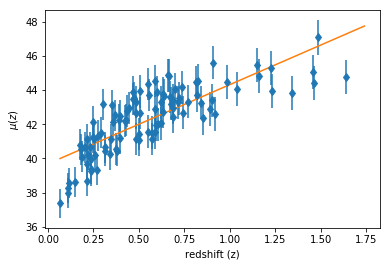

In [8]:
# Reading the data and filling data arrays
data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma

# MLE regression of a lineat model (deg=1)
p_model, cov = np.polyfit(x_data, y_data, deg=1, w=wght, cov=True)
xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)
y_model = p_model[1] + p_model[0]*xarr    
y_predict = p_model[1] + p_model[0]*x_data   

print 'Fitted coefficients: slope = %.3f, intercept= %.3f' %(p_model[0], p_model[1])

# Showing the results
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(xarr, y_model)         # Calculate y for the sorted x array
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

# Calculating the chi^2
chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
print 'chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-2, chi2/(len(x_data)-2))
print 'Covariance matrix : \n', cov

#### Quality of the linear regression:

We know that if we repeat the observations a large number of times, the $\chi^2$ should get distributed following a $\chi^2$ distribution. If $Q = \sum_{i=1}^{N} z_i^2$ is the sum of the squared residuals, the $\chi^2$ distribution, with $k = N$ degrees of freedom can be written:      
$$
p(Q/k) = \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

We know that the expectation value in that case is $k$ and the standard deviation $\sigma = \sqrt{2k}$. Hence, $E(\chi^2) = N-n_{\rm {param}}$. For the linear fit above, we have 98 dof and hence we expect our $\chi^2$ to be within some fraction of $\sigma = \sqrt{2*98} \sim 14 $ from 98. 

In fact, we can even be more quantitative as we can calculate the $P-$value associated to the $\chi^2$ we found. 
Remember, as we have a one-tailed-test, we can simply use `1-cdf(ourchi2)`


In [9]:
1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-2) # Using the cdf (1-p(x < x_i))
scipy.stats.chi2.sf(chi2, df= len(x_data)-2)    # Lazy way using the survival function -> p(x > x_i)

0.00028645132074049776

##### Exercise: 

Let's assume the following fake data set:
``` python 
a, b = 0.3, 0
xdata = np.arange(0., 6., 0.05)
sigma = np.zeros_like(xdata)+0.1  # homoscedastic errors
ydata = b + a * xdata + sigma * np.random.randn(len(xdata))
```
- Fit a straight line to those data
- Estimate the quality of the fit. Is it reasonable ? 
- Re-do the fit using wrong error bars (you can simply give an over/underestimated $\sigma$ when calculating the goodness of of fit). Try e.g. overestimate of the error bars by a factor 0.75, 0.9, 1.2, 1.5. Is the new $\chi^2$ plausible ? What can you say regarding the P-value associated to the $\chi^2$ found ?  

#### IV.1.2 General least-square fit

A generalisation of the case discussed in IV.1.1 is by considering that we have linear combination of any $K$ function of $x$. This could for example be a polynomial of order $K$: 

$$
y_i = \theta_0 + \theta_1\,x_i + \theta_2\, x_i^2 + ... + \theta_K \, x_i^K
$$

Either our model is truely polynomial, or is the result of the Taylor expansion of a non linear model. 

The formula derived for the linear model are still valid but we now need to replace the design matrix M by:
$$
M =  \left[ \begin{array}{cccc}
1 & x_0 & x_0^2 & ... & x_0^K\\ 
1 & x_1 & x_1^2 & ... & x_1^K \\ 
... \\ 
1 & x_{N-1} & x_{N-1}^2 & ... & x_{N-1}^K
 \end{array} \right], 
$$

If we fit a polynomial of order $p$ to data sets of $k$ dimensions, the number of parameters is given by:
$$
m = \frac{(p+k)!}{p!k!},
$$

and the number of degrees of freedom $\nu = N-m$. For our typical 1D case, we have $m = p+1$, where p is the order of the polynomial, but if you increase the number of dimensions, the number of parameters increases exponentially with the order p (as seen in the above expression of $m$).

For the fit we can make use of `np.polyfit()`:

Fitted coefficients:  [ -7.10642177  28.05365322 -40.36861874  27.70828185  35.79938077]
chi^2 = 96.94 , for 95 dof, namely a reduced chi2= 1.02
p_value 4.254e-01
Covariance matrix : 
[[  15.48973905  -49.84437726   52.39566332  -20.39654589    2.30053446]
 [ -49.84437726  163.33570862 -175.50232032   69.97803277   -8.08844771]
 [  52.39566332 -175.50232032  193.82605035  -79.78423477    9.55098348]
 [ -20.39654589   69.97803277  -79.78423477   34.2373496    -4.32372705]
 [   2.30053446   -8.08844771    9.55098348   -4.32372705    0.59923397]]


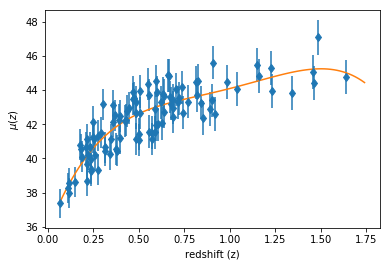

In [145]:
# Using np.polyfit()

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma
deg=4
p_model, cov = np.polyfit(x_data, y_data, deg=deg, w=wght, cov=True)

xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)

p = np.poly1d(p_model)              # This is a class to build 1d polynomial ! Let's use it ! 
y_model = p(xarr)
y_predict = p(x_data)

print 'Fitted coefficients: ', p_model

plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(xarr, y_model)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
p_value = scipy.stats.chi2.sf(chi2, df= len(x_data)-(deg+1)) 
print 'chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-(deg+1), chi2/(len(x_data)-(deg+1)))
print 'p_value %.3e' % p_value
print 'Covariance matrix : \n', cov

#### IV.1.3 Basis function regression

The polynomial fit can be generalized to a fit of linear combination of basis functions, i.e. one can replace any row of the design matrix with any series of linear or non-linear functions of $x_i$. In other words, we replace:
$$
y_i = \theta_0 + \theta_1\,x_i + \theta_2\, x_i^2 + ... + \theta_K \, x_i^K
$$
by 
$$
y_i = \theta_0 + \theta_1\,B_1(x_i) + \theta_2\, B_2(x_i) + ... + \theta_K \, B_k(x_i)
$$

where $B_k(x_i)$ is an arbitrary basis function of our independent variable. 

As we are fitting only for coefficients multiplying these rows, the problem remains linear. Examples of such basis functions are "splines" and "Gaussian" basis function. 

Fitting basis functions can be done with the routine `BasisFunctionRegression` in `astroML.linear_model`. 

#### IV.1.4 Multi-Linear regression

The linear regression scheme introduced in [IV.1.1](IV.1.1) can be generalized to multivariate data. In that case insead of minimizing a line in 2 dimensions, we minimize an hyperplane in $k-$ dimensions: 

$$
y_i = \theta_0+\theta_1\,x_{i1} + \theta_2\,x_{i2} +  ...+ \theta_k \, x_{ik} + \epsilon_i
$$

The design matrix M is: 

$$
M =  \left[ \begin{array}{cccc}
1 & x_{00} & x_{01} & ... & x_{0k}\\ 
1 & x_{10} & x_{11} & ... & x_{1k} \\ 
... \\ 
1 & x_{N0} & x_{N1} & ... & x_{Nk}
 \end{array} \right], 
$$

** Python implementation ** The multilinear regression is implemented in the function `LinearRegression` which is part of `sklearn.linear_model`. 

For making your regression, you do the following:

``` python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y, weights)  # x need to be of shape [N,k],  while y and weight are of shape [N]
# Weights are 1/sigma_i where sigma_i is the uncertainty on y_i

y_predict = model.predict(x)  # Predicted values

a_mod = model.coef_       # Get the slope(s)
b_mod = model.intercept_  # Get the intercept

```
 

In [10]:
# Implementation of the linear fit with sklearn 
from sklearn.linear_model import LinearRegression

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data[:, np.newaxis]    # x should be [N,1] vector, because only 1 dependant variable !
wght = 1./sigma

model = LinearRegression()
model.fit(x_data, y_data, wght)
y_predict = model.predict(x_data)

# Results of the fit
slope = model.coef_       # Get the slope
intercept = model.intercept_  # Get the intercept
print 'Fitted coefficients: slope = %.3f, intercept= %.3f' %(slope, intercept)

chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
print 'chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-2, chi2/(len(x_data)-2))

Fitted coefficients: slope = 4.536, intercept= 39.744
chi^2 = 153.67 , for 98 dof, namely a reduced chi2= 1.57


### IV.2 Regularization and penalization of the likelihood

It is sometimes desirable to reduce the complexity of the regression model, for example when the likelihood has a complex structure, or when the data are highly correlated such that the matrices become ill conditioned and inversion impossible, or simply when some regions of the parameter space need to be avoided. In such cases, one apply a penalty to the likelihood function. 

Penalizing the regression is equivalent to minimizing 
$$
\chi^2 \equiv \sum_{i=1}^{n} \frac{\left(y_i - \theta_0 - \sum_{k=1}^p \theta_p B_p(x_{i}) \right)^2}{\sigma^2_i},
$$

BUT adding a constraint on the parameters $\theta_p$, such that e.g. $\sum |\theta_p | < s$ (LASSO regularisation) or $\sum \theta^2_p < s$ (Ridge regularization). 


Using the matrix formalism, this can be expressed in the following way:    
We have seen that the ML minimization consists in minimizing:
$$
(Y - M \boldsymbol{\theta})^T (Y - M\boldsymbol{\theta})
$$

The idea is to impose a penalty to this minimization term, namely:
$$
(Y - M \boldsymbol{\theta})^T (Y - M\boldsymbol{\theta}) + \lambda\,\left |\boldsymbol{\theta}^T\boldsymbol{\theta} \right|,
$$

where $\lambda$ is the regularisation coefficient, and $\left |\boldsymbol{\theta}^T\boldsymbol{\theta} \right|$ is an example of penalty function. 

Solving for $\boldsymbol{\theta}$ ($\partial / \partial\,\theta_j = 0$), we end up:

$$
\boldsymbol{\theta} = (M^T C^{-1} M + \lambda \,I)^{-1} \, (M^T C^{-1} Y),
$$
where $I$ is the identity matrix. 

Interestingly, if $M^T C^{-1} M$ was singular (precluding derivation of any solution) this won't be the case for $(M^T C^{-1} M + \lambda \,I)$, such that regularization can yield more robustly to a solution. 

#### IV.2.1 Ridge regression:

The use of $\left|\boldsymbol{\theta}^T\boldsymbol{\theta} \right|$ for the regularisation is called "ridge regression" or "Tikhonov regularisation". It penalizes the sum of the square of the regression coefficients such that $|\theta|^2 < s$. By precluding the sum of the squares of the coefficients to be too large. The smaller is the value of $s$ (which correspond to large $\lambda$) the more the regression coefficients will be driven towards 0. 

Ridge regression is implemented in `sklearn.linear_model.Ridge`

#### IV.2.2 LASSO regression:

The LASSO (Least Absolute Schrinkage and Selection) penalization uses the absolute values of the coefficients $\boldsymbol{\theta}$ instead of their square (cf. `Ridge` regression) to penalize the likelihood as:

$$
(Y - M \boldsymbol{\theta})^T (Y - M\boldsymbol{\theta}) + \lambda\,\left |\boldsymbol{\theta} \right|,
$$

which is equivalent in least square regression to a penalty on the absolute value of the regression coefficients $|\theta| < s$.  


The disadvantage of LASSO regression is that there is no closed-form solution and numerical techniques need to be developed to find a solution. 

#### IV.2.3 How to fix $\lambda$ ?:

One can evaluate the impact the amplitude of $\lambda$ on the regression by dividing the data set in subsets (typically, a *training set*, a *cross validation* set, and a *test set*) and evaluate how it modifies the fit. The value of $\lambda$ that introduces the minimum error is probably the best one. 

This method, called *k-fold cross validation* can be summarized as follow:
You split your data set in three parts: 
- A *training* set is used to evaluate the optimal values of $\theta_i$ and the associated errors. 
- A *cross validation* set, that allows you to evaluate cross-validation errors. Because the cross validation was not used to evaluate the parameters, the errors may be larger in case of high bias in the fit. Therefore, the model representing the cross validation is likely to be in practice a better model. 
- The same procedure is then applied to the *test set*, giving an idea of the error we would make with a new data set. 

This approach, called "k-fold cross validation" is very common in machine learning studies, but can also be used to evaluate $\lambda$ more objectively (provided that your data set is large enough to make it possible). Sect. 8.3.3 and 8.11.1 of our [book](#book) address those questions in slightly more details. 


### IV.3 Regression for non linear models:
    
When the model is **not** anymore linear *in its parameters*, then there is no direct solution through matrix inversion, and it becomes necessary to use purely numerical method. For frequentists, the strategy generally remains to optimize the maximum likelihood estimation, or equivalently minimizing the *weighted sum of the squared residuals* $\chi^2 \equiv\sum_{i=1}^{N} \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2$.   
Note that other merit function can be implemented (e.g. maximum entropy). 

A popular and efficient algorithm to find the parameters that minimize your $\chi^2$ merit function is the so-called Levenberg-Marquardt algorithm. Conceptually, that method switch between the "Gradient Descent Method" (you perturb the parameters by some amount "h" in the direction of steepest descent in your $\chi^2$ function), and the "Gauss-Newton Method" that assumes that locally your function is quadratic in the parameters to determine "h", through a "lagrange parameter" lambda that is modified depending of the observed change in merit function. 

In python, you can use the `curve_fit()` function from the `scipy.optimize` to apply levenberg Marquardt to the fit of your function. 

The `curve_fit()` function works like this:
``` python
# first create a function that defines your model
# It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
def func(x, p1, p2, p3):
y = f(x, p1, p2, p3)  # replace f(x, p1, p2, p3) by a function of vector x with parameters p1, p2, p3
    return y
# Second we call curve_fit(), first three arguments being func, xdata, ydata. Next two are optional initial guess and errors on y. 
pfit, pcov = scipy.optimize.curve_fit(func, xdata, ydata, p0=x0, sigma=sigma) 
# there is the possibility to constrain the parameters to certain ranges using method = 'trf'
```

** Important Note: ** There is currently important development of model fitting within the astropy package. Several of the algorithm used are wrapper on algorithms from other packages (such as `numpy` and `scipy.optimize`), so think also 
of having a look to `astropy.modeling` (http://docs.astropy.org/en/stable/modeling/) when you search for implementations of classical fitting algorithm in python. 

#### Example: 

Again, let's use our supernova data and try to fit a logarithmic function to it ... 

Fitted coefficients:  [ 44.26756374   5.97177442]
chi^2 = 98.24 , for 98 dof, namely a reduced chi2= 1.00
p_value 4.742e-01
Covariance matrix : 
[[ 0.02233408  0.03910563]
 [ 0.03910563  0.11367133]]


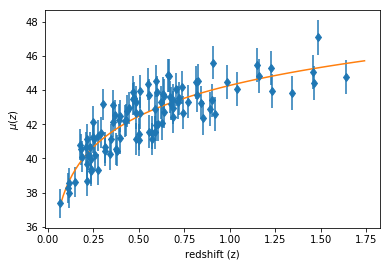

In [36]:
from scipy.optimize import curve_fit 

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma

def logmodel(x, p1, p2):
    return p1 + p2*np.log10(x)

p_model, cov = curve_fit(logmodel, x_data, y_data, sigma=sigma)

xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)

y_model = logmodel(xarr, p_model[0], p_model[1])
y_predict = logmodel(x_data,  p_model[0], p_model[1])

print 'Fitted coefficients: ', p_model

plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(xarr, y_model)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
p_value = scipy.stats.chi2.sf(chi2, df= len(x_data)-2) 
print 'chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-(2), chi2/(len(x_data)-(2)))
print 'p_value %.3e' % p_value
print 'Covariance matrix : \n', cov

**Exercise:**

Fit the model of your choice to the supernova data and use the bootstrap technique to estimate the error bars on the fitted parameters.    
Compare the bootstrap error to the one you derive using the covariance matrix.     

### IV.4 What if we have outliers, errors in $x$ and $y$, models with more parameters than data ?

There is "receipes" in the frequentist cookbook (see e.g. Numerical receipes) to address those problems, but Bayesian approaches provide sound and well motivated methodologies to deal with those situations ... provided you accept the Bayesian way to see data and models. 
Hence, you'll have to wait that we approach Bayesian statistical inference to have answer to those questions. 

## XX. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4 ** (4.5, 4.7), **Chapter 8 ** (8.1, 8.2, 8.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* $\chi^2$ and linear fits, Andy Gould, https://arxiv.org/abs/astro-ph/0310577

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a> (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9 **

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**

Other useful references to know more about the topics covered in this class: 

- Sklearn help: http://scikit-learn.org/stable/modules/linear_model.html

- Guide on General Least Square regression by Paul Johnson: http://pj.freefaculty.org/guides/stat/Regression/GLS/GLS-1-guide.pdf

- Contribution of Fisher to MLE: J.A. Aldrich R. A. Fisher and the Making of Maximum Likelihood 1912– 1922 About Fisher's invention of Maximum Likelihood: Statistical science, 1997, 12, 3, 162 https://projecteuclid.org/download/pdf_1/euclid.ss/1030037906 

